In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Beyond 1

Load NYC taxi data from both 2019 and 2020, January and July. Remove data from outside of those years and months.

Now display the number of trips on each day of the month in four separate graphs -- the top row in 2019, and the bottom row in 2020, the left column for January and the right column for July.

In [2]:
filenames = ['../data/nyc_taxi_2019-01.csv', '../data/nyc_taxi_2019-07.csv',
             '../data/nyc_taxi_2020-01.csv', '../data/nyc_taxi_2020-07.csv']

all_dfs = [pd.read_csv(one_filename,
           usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
                    'total_amount'],
           parse_dates=['tpep_pickup_datetime'])
           for one_filename in filenames]

df = pd.concat(all_dfs)

df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day

df = df.loc[(df['month'].isin([1, 7])) & (df['year'].isin([2019, 2020]))]

# Assign df to a random sample of 1% of the elements in df
df = df.sample(frac=0.01)

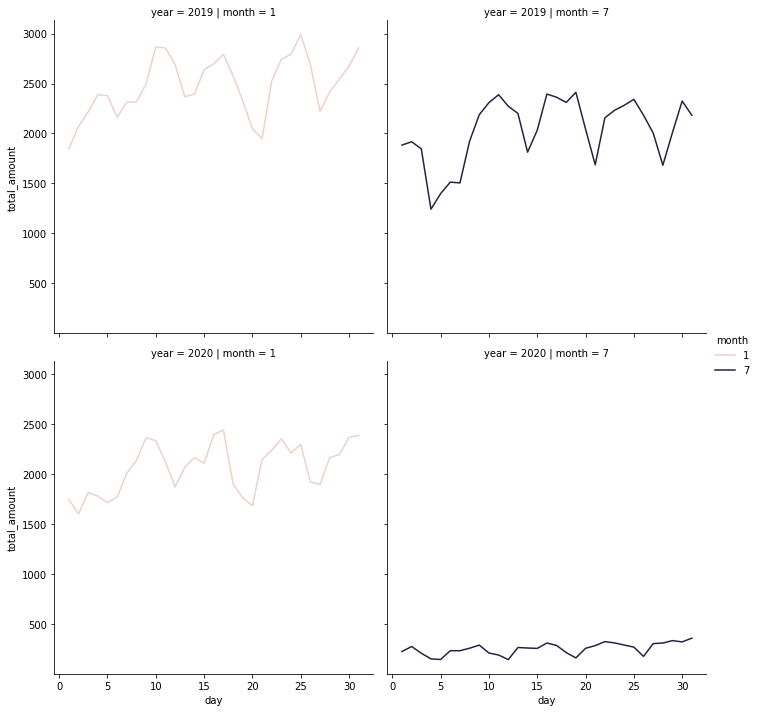

In [3]:
sns.relplot(x='day', y='total_amount', hue='month', kind='line', 
            row='year', col='month',
            data=df.groupby(['year','month', 'day'])[['total_amount']].count().reset_index(),
            ci=None)

# Beyond 2

Add a "trip_length" column, for short, medium, and long trips, as we did in Exercise 7.  Show
the trip distance per day of month in three plots alongside one another, with one for
each category.

In [4]:
df = df.reset_index(drop=True)

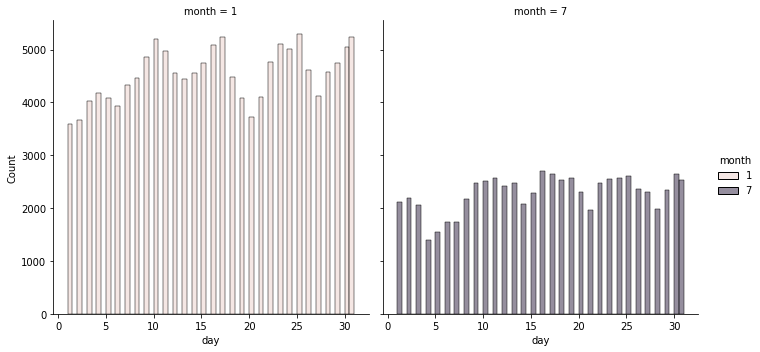

In [5]:
sns.displot(x='day', data=df, hue='month', col='month')

# Beyond 3

Create a bar plot, showing how many rides took place in each hour (0-24) in each month (January and July). Each month should appear in a different color, and they should appear side-by-side, with January on the left and July on the right.